##Hrishikesh Rendalkar 011485994
###Topics coverd:
    1.Preprocessing
    2.Visualization
    3.Lemmatization
    4.Stemming
    5.Spell Check
    6.Dictionary
    7.LDA
    8.TF-IDF
    9.LDA using TF-IDF
    10.Sentiment analysis
    11.Rating
    12.Vectorization


In [211]:
# read data into a dataframe
import pandas as pd
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
dfs_train = pd.read_excel("train.xlsx")
dfs=dfs_train

Let us print all the columns for better understanding of the dataset

In [212]:
#observe a row
print("Number of Rows and Columns::", dfs.shape)
print(dfs_train.loc[0])

Number of Rows and Columns:: (10269, 14)
ID                                                              2635.json
label                                                               False
statement               Says the Annies List political group supports ...
subject(s)                                                       abortion
speaker                                                      dwayne-bohac
speaker's job title                                  State representative
state info                                                          Texas
party affiliation                                              republican
barely true counts                                                      0
false counts                                                            1
half true counts                                                        0
mostly true counts                                                      0
pants on fire counts                                                   

In [213]:
#cleaning and preprocessing
X_train=dfs["party affiliation"]
Y_train=dfs["label"]

In [214]:
CT = pd.crosstab(dfs_train['party affiliation'],dfs_train['label'],margins=True)

Let us now identify the labels for different party affiliations

In [215]:
CT.sort_values('All', ascending=False)

label,False,True,barely-true,half-true,mostly-true,pants-fire,All
party affiliation,,,,,,,
All,1995,1682,1656,2123,1965,842,10263
republican,1029,662,834,894,709,380,4508
democrat,512,660,463,752,801,154,3342
none,326,247,261,327,316,269,1746
organization,50,24,45,59,24,18,220
independent,18,29,19,28,51,3,148
newsmaker,9,16,7,11,11,4,58
libertarian,6,6,4,12,9,3,40
activist,7,5,7,10,11,0,40


Let us see the total number of times each party was mentioned in the dataset. From this we can infer the that which parties are in the news and which are not.

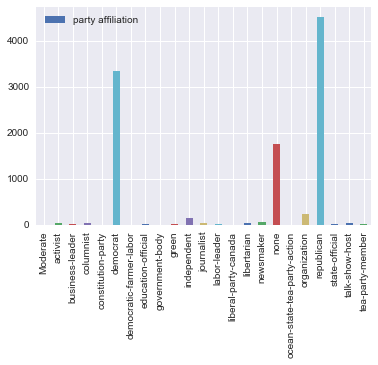

In [216]:
#democrats was mentioned around 3500 in total
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs['party affiliation'].value_counts().sort_index(ascending=True).head(10264).plot('bar', ax=ax, legend=True)

Let us visualize the value barely-true for the entire dataset

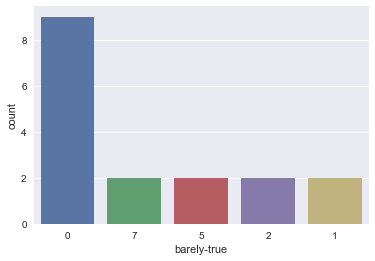

In [217]:
import seaborn as sns
sns.countplot(x="barely-true", data=CT,order=CT["barely-true"].value_counts().iloc[:5].index)
plt.show()

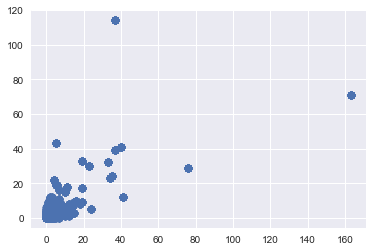

In [219]:
import matplotlib.pyplot as plt
#df = pd.DataFrame(d)
plt.scatter(dfs['mostly true counts'], dfs['false counts'])
plt.show()

Let us plot the values such as false, half-false, true, etc. for the party replublican. From this we can visualize the true and false news about a particular party. 

In [220]:
import numpy as np
mask = np.column_stack([dfs[col].str.contains("republican") for col in ['party affiliation']])
print (mask)
unique, counts = np.unique(mask, return_counts=True)
dict(zip(unique, counts))

[[True]
 [False]
 [False]
 ...
 [True]
 [False]
 [True]]


{False: 3928, nan: 1, True: 1388}

In [221]:
dfs['mask'] = mask

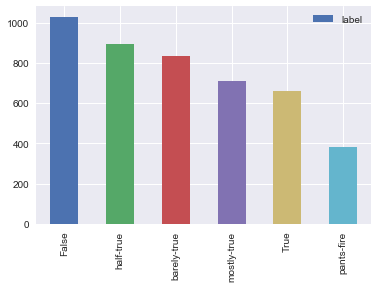

In [222]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs[dfs['mask']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

In [225]:
import numpy as np
mask = np.column_stack([dfs[col].str.contains("democrat") for col in ['party affiliation']])
print (mask)
unique, counts = np.unique(mask, return_counts=True)
dict(zip(unique, counts))

[[False]
 [True]
 [True]
 ...
 [False]
 [True]
 [False]]


{False: 1948, nan: 1, True: 153}

In [226]:
dfs['mask'] = mask

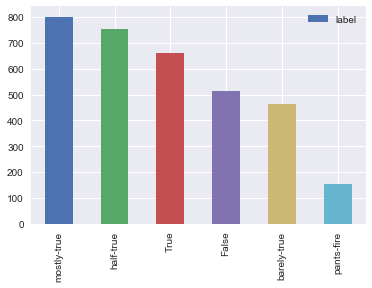

In [227]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs[dfs['mask']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

In [228]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [229]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


In [230]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [231]:
def lemmatize_stemming(text):
        return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    sdds= gensim.utils.simple_preprocess(text)
    for token in sdds:
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [232]:
# testing on a single document
doc_sample = dfs_train[dfs_train['ID'] == '2635.json']["statement"][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Says', 'the', 'Annies', 'List', 'political', 'group', 'supports', 'third-trimester', 'abortions', 'on', 'demand.']


 tokenized and lemmatized document: 
['say', 'anni', 'list', 'polit', 'group', 'support', 'trimest', 'abort', 'demand']


In [233]:
# do for all documents
processed_docs = dfs_train['statement'].map(preprocess)
processed_docs[:10]

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: statement, dtype: object

In [234]:
# create the dictionary
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


In [235]:
# remove all words that appear too many or too few times and restrict to 100000 words
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print(dictionary)

Dictionary(1069 unique tokens: ['abort', 'demand', 'group', 'list', 'polit']...)


In [236]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10][0]

#bow_corpus_list=[]
#for b in bow_corpus:
#    bow_corpus_list.append([i[0] for i in b])
#bow_corpus_list    


(24, 2)

In [237]:
# corpus and frequency count for each document
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))
print(len(bow_corpus))

Word 5 ("say") appears 1 time.
Word 24 ("vote") appears 1 time.
Word 117 ("state") appears 1 time.
Word 152 ("busi") appears 1 time.
Word 352 ("nurs") appears 1 time.
Word 535 ("small") appears 1 time.
Word 708 ("doctor") appears 1 time.
Word 906 ("put") appears 1 time.
Word 1065 ("interest") appears 1 time.
10269


In [238]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [239]:
corpus_tfidf = tfidf[bow_corpus]

In [240]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3399028377044521),
 (1, 0.49960086945501425),
 (2, 0.40963633375026987),
 (3, 0.46333565607020666),
 (4, 0.40830190020991924),
 (5, 0.10872586224577774),
 (6, 0.27175617970851096)]


In [241]:
#lda bag of words 
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [242]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.045*"say" + 0.021*"texa" + 0.021*"state" + 0.020*"american" + 0.016*"vote" + 0.012*"time" + 0.012*"million" + 0.010*"percent" + 0.009*"america" + 0.009*"nation"
Topic: 1 
Words: 0.036*"year" + 0.034*"state" + 0.033*"health" + 0.024*"care" + 0.017*"percent" + 0.014*"budget" + 0.013*"say" + 0.012*"billion" + 0.012*"wisconsin" + 0.012*"countri"
Topic: 2 
Words: 0.030*"state" + 0.029*"say" + 0.022*"republican" + 0.021*"percent" + 0.020*"vote" + 0.014*"senat" + 0.013*"democrat" + 0.013*"elect" + 0.012*"florida" + 0.012*"spend"
Topic: 3 
Words: 0.041*"percent" + 0.035*"job" + 0.023*"say" + 0.023*"american" + 0.022*"govern" + 0.019*"feder" + 0.016*"lose" + 0.015*"creat" + 0.011*"incom" + 0.010*"state"
Topic: 4 
Words: 0.053*"say" + 0.022*"clinton" + 0.017*"hillari" + 0.017*"school" + 0.015*"state" + 0.014*"tax" + 0.013*"public" + 0.013*"obama" + 0.012*"want" + 0.011*"presid"
Topic: 5 
Words: 0.034*"care" + 0.034*"health" + 0.030*"say" + 0.016*"cost" + 0.016*"year" + 0.015*"

Let us TF-IDF for running LDA

In [243]:
#lda tf-idf 
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [244]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.014*"say" + 0.014*"clinton" + 0.013*"hillari" + 0.010*"plan" + 0.009*"american" + 0.008*"percent" + 0.007*"republican" + 0.007*"right" + 0.007*"immigr" + 0.007*"fund"
Topic: 1 Word: 0.014*"govern" + 0.010*"say" + 0.010*"state" + 0.008*"year" + 0.007*"presid" + 0.007*"billion" + 0.007*"obama" + 0.007*"spend" + 0.007*"senat" + 0.007*"budget"
Topic: 2 Word: 0.015*"say" + 0.014*"obama" + 0.012*"state" + 0.012*"presid" + 0.011*"year" + 0.011*"barack" + 0.011*"job" + 0.010*"percent" + 0.009*"trump" + 0.008*"cost"
Topic: 3 Word: 0.015*"percent" + 0.012*"say" + 0.009*"obama" + 0.009*"vote" + 0.008*"year" + 0.008*"cut" + 0.008*"state" + 0.008*"bush" + 0.008*"abort" + 0.007*"presid"
Topic: 4 Word: 0.022*"health" + 0.022*"care" + 0.014*"say" + 0.013*"spend" + 0.012*"texa" + 0.011*"year" + 0.010*"state" + 0.010*"vote" + 0.010*"percent" + 0.007*"million"
Topic: 5 Word: 0.012*"say" + 0.012*"year" + 0.011*"million" + 0.011*"tax" + 0.010*"rais" + 0.008*"percent" + 0.008*"peopl" + 0.00

In [245]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6075707077980042	 
Topic: 0.034*"care" + 0.034*"health" + 0.030*"say" + 0.016*"cost" + 0.016*"year" + 0.015*"plan" + 0.014*"work" + 0.013*"million" + 0.013*"percent" + 0.011*"busi"

Score: 0.31241095066070557	 
Topic: 0.045*"say" + 0.021*"texa" + 0.021*"state" + 0.020*"american" + 0.016*"vote" + 0.012*"time" + 0.012*"million" + 0.010*"percent" + 0.009*"america" + 0.009*"nation"

Score: 0.010003095492720604	 
Topic: 0.059*"say" + 0.045*"obama" + 0.031*"presid" + 0.027*"barack" + 0.018*"vote" + 0.017*"percent" + 0.010*"go" + 0.010*"democrat" + 0.009*"citi" + 0.009*"republican"

Score: 0.01000268291682005	 
Topic: 0.044*"say" + 0.017*"immigr" + 0.016*"vote" + 0.016*"percent" + 0.013*"peopl" + 0.013*"illeg" + 0.012*"tax" + 0.011*"million" + 0.011*"year" + 0.009*"take"

Score: 0.010002577677369118	 
Topic: 0.030*"state" + 0.029*"say" + 0.022*"republican" + 0.021*"percent" + 0.020*"vote" + 0.014*"senat" + 0.013*"democrat" + 0.013*"elect" + 0.012*"florida" + 0.012*"spend"

Score: 0.

In [246]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5462266206741333	 
Topic: 0.013*"year" + 0.011*"say" + 0.008*"percent" + 0.008*"go" + 0.008*"state" + 0.007*"million" + 0.007*"obama" + 0.007*"vote" + 0.007*"children" + 0.006*"dollar"

Score: 0.3737533986568451	 
Topic: 0.022*"health" + 0.022*"care" + 0.014*"say" + 0.013*"spend" + 0.012*"texa" + 0.011*"year" + 0.010*"state" + 0.010*"vote" + 0.010*"percent" + 0.007*"million"

Score: 0.010003154166042805	 
Topic: 0.015*"state" + 0.012*"tax" + 0.012*"percent" + 0.011*"say" + 0.008*"rais" + 0.008*"countri" + 0.008*"vote" + 0.008*"year" + 0.008*"job" + 0.007*"florida"

Score: 0.01000308059155941	 
Topic: 0.013*"say" + 0.012*"school" + 0.012*"percent" + 0.011*"state" + 0.009*"year" + 0.009*"nation" + 0.008*"obama" + 0.008*"rate" + 0.007*"unemploy" + 0.007*"fund"

Score: 0.010002974420785904	 
Topic: 0.015*"percent" + 0.012*"say" + 0.009*"obama" + 0.009*"vote" + 0.008*"year" + 0.008*"cut" + 0.008*"state" + 0.008*"bush" + 0.008*"abort" + 0.007*"presid"

Score: 0.010002740658819675	 

classifying sample documents using LDA bag of words model.

In [247]:
unseen_document = 'Even after Obamacare is fully implemented, there still will be tens of millions of people not covered.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.887453019618988	 Topic: 0.036*"year" + 0.034*"state" + 0.033*"health" + 0.024*"care" + 0.017*"percent"
Score: 0.012507245875895023	 Topic: 0.043*"year" + 0.023*"obama" + 0.022*"state" + 0.021*"presid" + 0.018*"say"
Score: 0.012506850063800812	 Topic: 0.034*"care" + 0.034*"health" + 0.030*"say" + 0.016*"cost" + 0.016*"year"
Score: 0.012506522238254547	 Topic: 0.030*"state" + 0.029*"say" + 0.022*"republican" + 0.021*"percent" + 0.020*"vote"
Score: 0.01250610500574112	 Topic: 0.041*"percent" + 0.035*"job" + 0.023*"say" + 0.023*"american" + 0.022*"govern"
Score: 0.01250578835606575	 Topic: 0.044*"say" + 0.017*"immigr" + 0.016*"vote" + 0.016*"percent" + 0.013*"peopl"
Score: 0.012504266574978828	 Topic: 0.049*"say" + 0.036*"state" + 0.024*"percent" + 0.016*"year" + 0.016*"unit"
Score: 0.012504254467785358	 Topic: 0.045*"say" + 0.021*"texa" + 0.021*"state" + 0.020*"american" + 0.016*"vote"
Score: 0.012503820471465588	 Topic: 0.053*"say" + 0.022*"clinton" + 0.017*"hillari" + 0.017*"sc

C:\Users\hrish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,label,subject(s),verdict
0,False,abortion,0
1,half-true,"energy,history,job-accomplishments",1
2,mostly-true,foreign-policy,1
3,False,health-care,0
4,half-true,"economy,jobs",1
5,True,education,1
6,barely-true,candidates-biography,0
7,half-true,ethics,1
8,half-true,jobs,1
9,mostly-true,"energy,message-machine-2014,voting-record",1


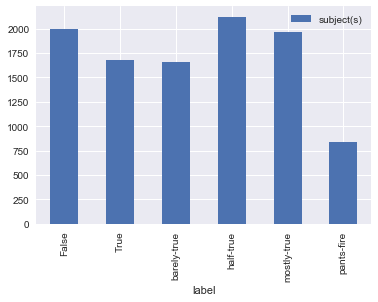

In [248]:
dfTwoCols= dfs_train[['label','subject(s)']]
dfTwoCols.groupby("label").count().plot(kind='bar')
dfTwoCols['verdict'] = dfTwoCols['label'].map({False: 0, True: 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols

In [249]:
dfs_train_sensa= dfs_train
dfs_train_sensa['verdict']=dfTwoCols['verdict']
dfs_train_sensa

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context,mask,verdict
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,False,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,True,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,True,1
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,False,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,True,1
5,12465.json,True,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,False,1
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,False,0
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",True,1
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,False,1
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,False,1


In [250]:
from nltk.corpus import wordnet as wn

def preprocess(raw_news):
    import nltk    
    news = re.sub("[^a-zA-Z]", " ", raw_news)    
    news =  news.lower()     
    news_words = nltk.word_tokenize( news)        
    stops = set(nltk.corpus.stopwords.words("english"))       
    words = [w for w in  news_words  if not w in stops]        
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]     
    return " ".join(stems)


import re
dfs['stemmed'] = dfs["statement"].apply(preprocess) 
#testing['statement'] = testing["statement"].apply(cleaning)
print(len(dfs), "statements")
#print(len(testing), "statements")

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def lemmatize(self, word, pos=wn.NOUN):
    lemmas = wordnet._morphy(word, pos)
    return min(lemmas, key=len) if lemmas else word

10269 statements


In [251]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
import time
def initial_clean(text):
    """
    Function to clean text of websites, email addresess and any punctuation
    We also lower case the text
    """
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)", " ", text)
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    return text

stop_words = stopwords.words('english')
def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    return [word for word in text if word not in stop_words]

stemmer = PorterStemmer()
def stem_words(text):
    """
    Function to stem words, so plural and singular are treated the same
    """
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] # make sure we have no 1 letter words
    except IndexError: # the word "oed" broke this, so needed try except
        pass
    return text

def apply_all(text):
    """
    This function applies all the functions above into one
    """
    return stem_words(remove_stop_words(initial_clean(text)))
# clean text and title and create new column "tokenized"
t1 = time.time()
dfs['tokenized'] = dfs['statement'].apply(apply_all)
t2 = time.time()
print("Time to clean and tokenize", len(train_data), "articles:", (t2-t1)/60, "min")

Time to clean and tokenize 10240 articles: 0.23657491207122802 min


In [252]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [253]:
testing = dfs['statement']

In [254]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [255]:
sid = SentimentIntensityAnalyzer()

In [256]:
count=0
for x in testing:
    if count<3:
        print(x)
        ss = sid.polarity_scores(x)
        for k in sorted(ss):
            print("{0}:{1},".format (k, ss[k]), end ="\n\n")
            print
    count+=1

Says the Annies List political group supports third-trimester abortions on demand.
compound:0.25,

neg:0.115,

neu:0.692,

pos:0.192,

When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
compound:0.3612,

neg:0.0,

neu:0.902,

pos:0.098,

Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
compound:0.3182,

neg:0.107,

neu:0.687,

pos:0.206,



sentiment_polarity = [] 

from nltk.sentiment.vader import SentimentIntensityAnalyzer
# install Vader and make sure you download the lexicon as well
sid = SentimentIntensityAnalyzer()
# this step will return an error if you have not installed the lexicon
summary = {"positive":0,"neutral":0,"negative":0}
for x in train_data['statement']: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        summary["neutral"] +=1
        sentiment_polarity.append("neutral")
        
    elif ss["compound"] > 0.0:
        summary["positive"] +=1
        sentiment_polarity.append("positive")
     
    else:
        summary["negative"] +=1
        sentiment_polarity.append("negative")
        
print(summary)
dfs['sentiment_polarity'] = sentiment_polarity

In [257]:
from os import path
#train_path = Path('.')
import pandas as pd

headers = ['id','label','statement','subject',
           'speaker','job_title', 'state', 
           'affliation','barely_true','false',
           'half_true', 'mostly_true','pants_on_fire', 
           'venue']
print (len(headers))
liar_train_df = pd.read_csv('train.tsv', names=headers, delimiter='\t')
liar_valid_df = pd.read_csv('valid.tsv', names=headers, delimiter='\t')
#liar_test_df = pd.read_csv('test.tsv',names=headers, delimiter='\t')
#train_df['statement'].head()

14


In [258]:
word_vector_input_dataset = []
word_vector_input_dataset = train_df.statement.tolist()

In [259]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
data = word_vector_input_dataset
tagged_data = []
exception_count = 0
for i, _d in enumerate(data):
    try:
        tagged_data.append(TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]))
    except:
        exception_count+=1
### Train doc2vec embeddings 
print ("Total number of custom documents:",len(tagged_data))
max_epochs = 10
vec_size = 10
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=10,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v1.model")
print("Model Saved")

Total number of custom documents: 10240


C:\Users\hrish\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


C:\Users\hrish\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


In [260]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
text = "obama supports third trimester abortion"
dvmodel= Doc2Vec.load("d2v1.model") ### Using a earlier trained model d2v.model 
test_sentence= [dvmodel.infer_vector(word_tokenize(text))]
print (test_sentence)

[array([ 0.16300735,  0.02851302,  0.1210183 ,  0.12861009,  0.04851915,
       -0.06422314,  0.04851199,  0.12535633, -0.18410438, -0.00209246],
      dtype=float32)]


In [261]:
statements = liar_train_df.statement.tolist()
statements_wv = [dvmodel.infer_vector(word_tokenize(x)) for x in statements]

In [262]:
dataframe = pd.DataFrame(statements_wv)
#dataframe['affliation'] = pd.Series(tr_affliation)
dataframe['state'] = pd.Series(train_df.state)
dataframe['job_title'] = pd.Series(train_df.job_title)
dataframe['venue'] = pd.Series(train_df.venue)
dataframe.columns=['0','1','2','3','4','5','6','7','8','9','state','job_title','venue']
dataframe['label'] = pd.Series(train_df.label)

In [263]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,state,job_title,venue,label
0,-0.332397,-0.012155,-0.297835,-0.330891,0.167781,-0.272364,-0.705519,-0.308841,0.059850,-0.181532,Texas,State representative,a mailer,false
1,-0.355470,-0.114428,0.186163,-1.130693,0.096678,-0.350244,-0.861623,-0.345612,0.202899,-0.292764,Virginia,State delegate,a floor speech.,half-true
2,-0.144256,-0.018408,-0.495160,-0.546811,0.079283,-0.216411,-0.873592,-0.108756,0.013668,-0.232979,Illinois,President,Denver,mostly-true
3,-0.008124,0.141245,-0.151149,0.014884,0.122255,-0.309812,-0.025191,-0.002879,-0.036921,0.025443,NaN,NaN,a news release,false
4,-0.217310,-0.110120,-0.104770,-0.419885,-0.005736,-0.262021,-0.645855,-0.271057,-0.098297,-0.178541,Florida,NaN,an interview on CNN,half-true


party_affliation_vector =[]
prediction =[]

for i in range(0,len(dataframe)):
    inference = learn.predict(dataframe.iloc[i])
    prediction.append(inference[0])
    party_affliation_vector.append(inference[2])

In [264]:
dfs_test = pd.read_excel("train.xlsx")
dfs=dfs_test
msg_test=dfs_test["statement"]
dfTwoCols_test= dfs_test[['label','subject(s)']]
dfTwoCols_test['verdict'] = dfTwoCols_test['label'].map({False: 0, True: 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols_test
class_test=np.array(dfTwoCols_test["verdict"])
print(class_test)
class_test=class_test.reshape(-1,1)
print(class_test)
#predictions = pipeline.predict(msg_test)

[0 1 1 ... 1 0 0]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


C:\Users\hrish\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [265]:
dfs_test_sensa=dfs_test
dfs_test_sensa['verdict']=dfTwoCols_test['verdict']
dfs_test_sensa

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context,verdict
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1
5,12465.json,True,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,1
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,0
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",1
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,1
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,1


In [279]:
x_train=dfs_train_sensa[dfs_train_sensa.columns[14]]
y_train=dfs_train_sensa['verdict']
x_test= dfs_test_sensa[dfs_test_sensa.columns[14]]
y_test = dfs_test_sensa['verdict']

In [280]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x_train=le.fit_transform(x_train)
#x_train=le.transform(x_train)
X_train

0          republican
1            democrat
2            democrat
3                none
4            democrat
5          republican
6          republican
7            democrat
8        organization
9          republican
10           democrat
11        independent
12         republican
13               none
14          columnist
15        independent
16           democrat
17         republican
18           democrat
19           democrat
20         republican
21               none
22           democrat
23               none
24               none
25           democrat
26           democrat
27         republican
28           activist
29         republican
             ...     
10239        democrat
10240        democrat
10241      republican
10242        democrat
10243      republican
10244      republican
10245     libertarian
10246        democrat
10247      republican
10248      republican
10249        democrat
10250      republican
10251      republican
10252            none
10253     

In [283]:
x_train=np.array(x_train)
x_train=x_train.reshape(-1,1)
x_train = [x for x in x_train if str(x) != 'nan']
x_train
x_test=np.array(x_test)
x_test=x_test.reshape(-1,1)
x_test = [x for x in x_test if str(x) != 'nan']
y_train=np.array(y_train).reshape(-1,1)

In [287]:
#Decision tree
from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
dot_data = StringIO()  
dtree=DecisionTreeClassifier()
features = list(dfs_train_sensa.columns[14])
from sklearn.metrics import accuracy_score
#features = array.reshape(-1, 1)


dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print('Accuracy score is:')
print(accuracy_score(y_test,y_pred))



Accuracy score is:
0.4379199532573766


In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_test,y_pred))
cnfmtx=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy :', accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.44      1.00      0.61      4497
          1       0.00      0.00      0.00      5772

avg / total       0.19      0.44      0.27     10269

Confusion matrix:
 [[4497    0]
 [5772    0]]
Mean squared error: 0.56
Mean absolute error: 0.56
Root Mean Squared Error: 0.75 
Accuracy : 0.4379199532573766


C:\Users\hrish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hrish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Political affiliation is efficient when we consider the verdict, statements and ploitical affiliation column together. 
But this is not sufficient to test the fake news. So I can assign around 20% weightage to political affiliation.
so the equation would be 0.2*(result from random forest/naive bayes)